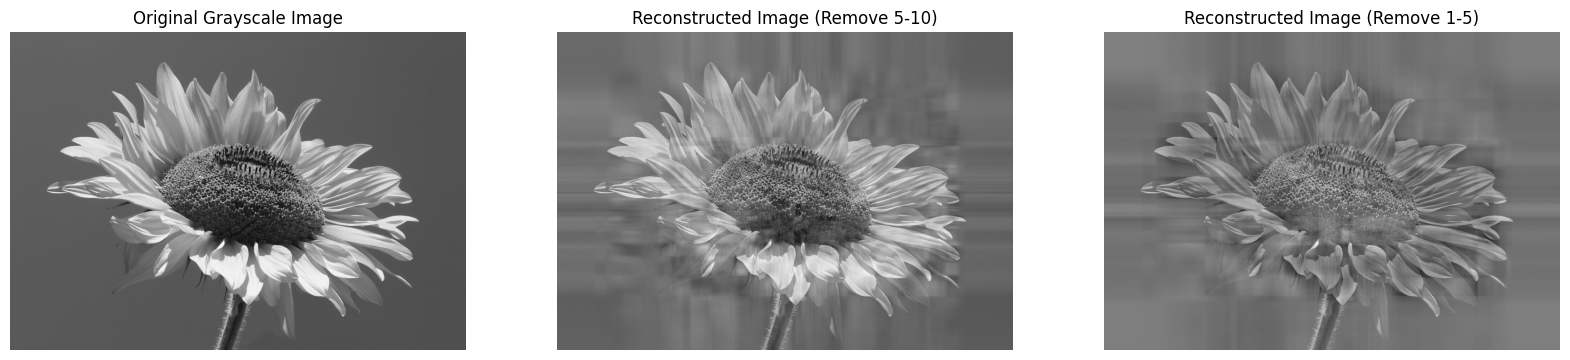

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

# Step 1: Load and preprocess the image
# We'll use a sample image from skimage's dataset which is copyright-free
image = io.imread('https://upload.wikimedia.org/wikipedia/commons/4/41/Sunflower_from_Silesia2.jpg')
gray_image = color.rgb2gray(image)

# Step 2: Apply SVD decomposition
U, S, Vt = np.linalg.svd(gray_image, full_matrices=False)

# Function to reconstruct image using selected singular values
def reconstruct_image(U, S, Vt, remove_indices=None):
    if remove_indices is not None:
        S = np.copy(S)
        S[remove_indices] = 0
    return np.dot(U, np.dot(np.diag(S), Vt))

# Step 3: Reconstruct the images
# Original reconstruction
reconstructed_original = reconstruct_image(U, S, Vt)

# Removing the 5th singular vector
reconstructed_remove_5th = reconstruct_image(U, S, Vt, remove_indices=[5, 6, 7, 8, 9])

# Removing the 1st singular vector
reconstructed_remove_1st = reconstruct_image(U, S, Vt, remove_indices=[0, 1, 2, 3, 4])

# Step 4: Display the images
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

axs[0].imshow(gray_image, cmap='gray')
axs[0].set_title("Original Grayscale Image")
axs[0].axis('off')

# axs[1].imshow(reconstructed_original, cmap='gray')
# axs[1].set_title("Reconstructed Image (Full SVD)")
# axs[1].axis('off')

axs[1].imshow(reconstructed_remove_5th, cmap='gray')
axs[1].set_title("Reconstructed Image (Remove 5-10)")
axs[1].axis('off')

axs[2].imshow(reconstructed_remove_1st, cmap='gray')
axs[2].set_title("Reconstructed Image (Remove 1-5)")
axs[2].axis('off')

plt.show()
